#  Data Integration and Reshape

#### Name: Bolin Yang

Date: 20190613

Environment: Python 3.7 and Jupyter notebook
Libraries used: 
* re (for regular expression) 
* pandas
* sklearn
* numpy
* datetime
* matplotlib
* codecs
* fiona
* shapely.geometry
* geopy (for calculate geographic distance, might need pip install)
* sklearn

# Task 1: Data Integration

## 1. Introduction
In this task, you are required to integrate these datasets into one with the following schema.

## 2. Import library

In [4]:
import pandas as pd
import numpy as np
import re
import codecs
from datetime import datetime
from datetime import time
from dateutil import parser
#GTFS
import fiona
from shapely.geometry import MultiPoint, Point, Polygon,shape, MultiPolygon
from shapely.geometry.polygon import Polygon
import math
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
# Configure visualisations
%matplotlib inline
#linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 3.Read file 

#### Read data file and simply see the value of each column

In [2]:
pd.set_option("precision",9)

In [6]:
data_df = pd.read_csv("Data_file/task4_integrate_reshape.csv")

In [4]:
data_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID291519933,2/23 Foam St,2,u,582500.0,8/10/2016,1.0,1.0,0.0,49.0,-37.88500,144.9910
1,ID777648929,6/210 Domain Rd,2,u,832000.0,15/10/2016,1.0,1.0,0.0,59.0,-37.83420,144.9842
2,ID436934525,52 Richardson St,3,h,508000.0,15/07/2017,2.0,1.0,189.0,29.0,-37.68159,145.0371
3,ID648123973,17 George St,4,h,875000.0,14/05/2016,3.0,1.0,321.0,69.0,-37.74240,144.8851
4,ID303786399,1/11 Brockley Rd,3,h,400000.0,22/05/2016,1.0,1.0,285.0,49.0,-37.71610,144.9662


In [5]:
data_df.describe()

,Rooms,Price,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
count,720.000000000,7.200000000e+02,720.000000000,720.000000000,720.000000000,720.000000000,720.000000000,720.000000000
mean,2.925000000,1.057967306e+06,1.498611111,1.580555556,502.080555556,54.801388889,-37.805788944,144.982019347
std,0.952231841,6.520779593e+05,0.687660575,0.973449895,1065.553472203,35.444026248,0.078327138,0.103333535
min,1.000000000,1.310000000e+05,0.000000000,0.000000000,0.000000000,3.000000000,-38.157520000,144.485710000
25%,2.000000000,6.400000000e+05,1.000000000,1.000000000,182.750000000,22.000000000,-37.849897500,144.922345000
50%,3.000000000,8.815000000e+05,1.000000000,1.500000000,438.500000000,49.000000000,-37.799150000,144.990650000
75%,3.000000000,1.325000000e+06,2.000000000,2.000000000,645.500000000,78.250000000,-37.757100000,145.046827500
max,8.000000000,7.650000000e+06,5.000000000,8.000000000,21715.000000000,156.000000000,-37.500870000,145.294930000


In [6]:
len(data_df)

720

## 3. Find suburb

In [7]:
#read shp file
shapefile =  fiona.open("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp")

In [8]:
#set a default value for suburb volumn
data_df['Suburb'] = "0"

In [9]:
#follow the order of ID to find the suburb

for i in range(len(data_df)):
    point = Point(data_df.loc[i,'Longtitude'],data_df.loc[i,'Lattitude'])
    #print(posit_set)
    for j in range(2973):
        suburb_polygon = shape(shapefile[j]['geometry'])
        if point.within(suburb_polygon):
            #print("find")
            #count+=1
            data_df.loc[i,'Suburb'] = shapefile[j]['properties']['VIC_LOCA_2']
    #suburb(posit_set)

In [10]:
#shapefile[0]['properties']["VIC_LOCA_2"]

In [11]:
data_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID291519933,2/23 Foam St,2,u,582500.0,8/10/2016,1.0,1.0,0.0,49.0,-37.88500,144.9910,ELWOOD
1,ID777648929,6/210 Domain Rd,2,u,832000.0,15/10/2016,1.0,1.0,0.0,59.0,-37.83420,144.9842,SOUTH YARRA
2,ID436934525,52 Richardson St,3,h,508000.0,15/07/2017,2.0,1.0,189.0,29.0,-37.68159,145.0371,THOMASTOWN
3,ID648123973,17 George St,4,h,875000.0,14/05/2016,3.0,1.0,321.0,69.0,-37.74240,144.8851,NIDDRIE
4,ID303786399,1/11 Brockley Rd,3,h,400000.0,22/05/2016,1.0,1.0,285.0,49.0,-37.71610,144.9662,FAWKNER


In [12]:
#change the order of column as schema
col_name =['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car','Landsize','Age','Lattitude','Longtitude']
data_df=data_df.reindex(columns=col_name)

In [13]:
data_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662


## 4.Find cloest train station
* directly to Southern Cross
    the stop_id and lat and lon of destination(Southern Cross) is given 
* all weekdays
* departing between 7:00-9:30


#### structure:
* strp1: Deal with kinds of txt in gtfs

* step2: Extract data(serivice_id, strat_date,end_data) in Calendar
    in which all weekdays have trips
    
* step3: Extract trip_id responding with service_id in Trips
    get list of dicts include service_id, trip_id
    
* step4: Extract trip_id responding with stop_id is Southern_Cross

* step5: inner join step3 and step4 with the keys is trip_id, 
    which means that we get the trip all weekdays services, arrive at SC
    
* step6: extract the dep_stop_id of depature train station in which the   depature time is between 7:00-9:30am in stoptimes dataframe;
  Then join the result of step 5 and step 6 to find the trip that          directly fo to SC and have service all weekdays and dep time between     7:00-9:30am

* step7: calculate the distance between property and extracted possible train station(be extracted in step6)


#### note:
* Since combine all the same kind of txt in GTFS, for example, in stop file, there are some stop points which have the same lat,lon,stopname, however the stop_id is not the same, we just choose the first one that fit the criteria

### 4.1Deal with txt files in gtfs

#### Read Stops files and merge them to dataframe

try to read one stop file in dataframe to see the result

In [14]:
#stops file
stops_df1 = pd.read_csv('gtfs/1/google_transit/stops.txt', sep=",", header=None, names=['stop_id','stop_name','stop_lat','stop_lon'])

In [15]:
stops_df1.tail()

,stop_id,stop_name,stop_lat,stop_lon
105,47641,Waurn Ponds Railway Station (Waurn Ponds),-38.2158144726992,144.30681939977
106,47642,Epsom Railway Station (Epsom),-36.706341584195,144.321039539468
107,47647,Wyndham Vale Railway Station (Wyndham Vale),-37.8717818287661,144.60847208057
108,47648,Tarneit Railway Station (Tarneit),-37.8321681307146,144.694714384216
109,52011,Caroline Springs Railway Station (Ravenhall),-37.7671526360564,144.73802162301


In [16]:
len(stops_df1)

110

merge all the stop files

In [17]:
'''
Read all stops.txt files in gtfs, then combine them into one text and read it in dataframe
'''
all_txt = codecs.open('all_stops.txt','a')
for i in range(1,12):
    #all = codecs.open('all.txt','a')
    if i==9:
        pass
    else:
        
        path = "gtfs/"+str(i)+"/google_transit"
        filename=path+"/"+"stops.txt"
        fopen=codecs.open(filename,'r',encoding='utf-8')  
        lines=[]  
        lines=fopen.readlines()  
        fopen.close()  
         
        for line in lines[1:]: #don't add the columns' name into final text

            for x in line:  
                all_txt.write(x)
                

In [18]:
#Read the stopstxt that includes all stops information in dataframe
stops_df_all = pd.read_csv('all_stops.txt', sep=",", header=None, names=['stop_id','stop_name','stop_lat','stop_lon'])

In [19]:
len(stops_df_all)

84621

In [20]:
stops_df_all.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861003,145.005372256
1,19980,Melton Railway Station (Melton South),-37.703293346,144.572524145
2,19981,Rockbank Railway Station (Rockbank),-37.729261271,144.650631484
3,19982,Deer Park Railway Station (Deer Park),-37.777763747,144.772303609
4,19998,Sunbury Railway Station (Sunbury),-37.579206387,144.728164508


In [21]:
#delete duplicate rows and reindex rows
stops_df=stops_df_all.drop_duplicates(subset=None, keep='first', inplace=False)
stops_df= stops_df.reset_index(drop=True)

In [22]:
print(len(set(list(stops_df['stop_id']))))
print(len(list(stops_df['stop_id'])))

27338
27338


#### Read Stop_times files and merge them to dataframe
use the same method as stops.txt files

In [23]:
''' Define a function to combine all same kind of txt in gtfs to one whole txt, the method is same as stops.txt above
# alltxt is the txt conclude all txt data,must be str
# txtname is the name of text be extracted,must be str'''
def combinefile(alltxt,txtname):
    all_txt = codecs.open(alltxt,'a')
    for i in range(1,12):
    #all = codecs.open('all.txt','a')
        if i==9:
            pass
        else:
        
            path = "gtfs/"+str(i)+"/google_transit"
            filename=path+"/"+ txtname
            fopen=codecs.open(filename,'r',encoding='utf-8')  
            lines=[]  
            lines=fopen.readlines()  
            fopen.close()  
         
            for line in lines[1:]:
              
                for x in line:  
                    all_txt.write(x)

In [24]:
#read and combine stoptimes files 
combinefile("all_stop_times.txt","stop_times.txt")

In [25]:
#see all stoptimes in dataframe
stoptimes_df_all = pd.read_csv('all_stop_times.txt', sep=",", header=None, names=['trip_id','arrival_time','departure_time','stop_id','stop_sequence','stop_headsign','pickup_type','drop_off_type','shape_dist_traveled'])

In [ ]:
#stoptimes_df_all.head()

In [26]:
#drop columns we don't need 
stoptimes_df = stoptimes_df_all.drop(['stop_headsign','pickup_type','drop_off_type','shape_dist_traveled'], axis=1)

In [27]:
stoptimes_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5


In [28]:
len(stoptimes_df)

13402785

In [29]:
#delete duplicate rows and reindex rows
stoptime_df=stoptimes_df.drop_duplicates(subset=None, keep='first', inplace=False)
stoptime_df= stoptime_df.reset_index(drop=True)

In [30]:
len(stoptime_df)

4467595

#### Read Trips files and merge them to dataframe
use the same method as stops.txt files, use the "combinefile" function

In [31]:
#read and combine trips files 
combinefile("all_trips.txt","trips.txt")

In [32]:
#see all trips in dataframe
trips_df_all = pd.read_csv('all_trips.txt', sep=",", header=None, names=['route_id','service_id','trip_id','shape_id','trip_headsign','direction_id'])

In [33]:
trips_df_all.head(10)

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1
5,1-V08-G-mjp-1,T0,1524.T0.1-V08-G-mjp-1.6.R,1-V08-G-mjp-1.6.R,Bairnsdale,1
6,1-V12-G-mjp-1,T0,1079.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
7,1-V12-G-mjp-1,T0,1094.T0.1-V12-G-mjp-1.1.H,1-V12-G-mjp-1.1.H,Melbourne,0
8,1-V12-G-mjp-1,T0,1080.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0
9,1-V12-G-mjp-1,T0,1092.T0.1-V12-G-mjp-1.2.H,1-V12-G-mjp-1.2.H,Melbourne,0


In [34]:
len(trips_df_all)

394635

In [35]:
#delete duplicate rows and reindex rows
trips_df=trips_df_all.drop_duplicates(subset=None, keep='first', inplace=False)
trips_df= trips_df.reset_index(drop=True)

In [36]:
len(trips_df)

131545

#### Read Calendar files and merge them to dataframe
use the same method as stops.txt files, use the "combinefile" function

In [37]:
#read and combine trips files 
combinefile("all_calendar.txt","calendar.txt")

In [38]:
#see all trips in dataframe
calendar_df_all = pd.read_csv('all_calendar.txt', sep=",", header=None, names=['service_id','monday','tuesday','wednesday','thursday','friday','saturday','sunday','start_date','end_date'])

In [39]:
calendar_df_all.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UR,0,0,0,1,0,0,0,20190509,20190509
1,T6,0,0,0,0,1,0,0,20190510,20190510
2,T2,0,0,0,0,0,1,0,20190511,20190511
3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,UO,1,0,0,0,0,0,0,20190513,20190513


In [40]:
len(calendar_df_all)

1116

In [41]:
#delete duplicate rows and reindex rows
calendar_df=calendar_df_all.drop_duplicates(subset=None, keep='first', inplace=False)
calendar_df= calendar_df.reset_index(drop=True)

In [42]:
len(calendar_df)

265

### 4.2 Extract data in Calendar
* service_id, start_date,end_date when all weekdays have trip seivice

In [43]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 10 columns):
service_id    265 non-null object
monday        265 non-null int64
tuesday       265 non-null int64
wednesday     265 non-null int64
thursday      265 non-null int64
friday        265 non-null int64
saturday      265 non-null int64
sunday        265 non-null int64
start_date    265 non-null int64
end_date      265 non-null int64
dtypes: int64(9), object(1)
memory usage: 20.8+ KB


In [44]:
calen_dict ={}
seriveid_list =[]
star_list = []
end_list = []
for i in range(len(calendar_df)):
    
    if calendar_df.loc[i,'monday']==1 and calendar_df.loc[i,'tuesday']==1:
        #print("1")
        if calendar_df.loc[i,'wednesday']==1 and calendar_df.loc[i,'thursday']==1:
            #print("2")
            if calendar_df.loc[i,'friday']==1:
                seriveid_list.append(calendar_df.loc[i,'service_id'])
                star_list.append(calendar_df.loc[i,'start_date'])
                end_list.append(calendar_df.loc[i,'end_date'])

In [45]:
print(len(seriveid_list))
print(len(star_list))
print(len(end_list))

41
41
41


In [46]:
#store each value of list to the dict
calen_dict['service_id']=seriveid_list
calen_dict['start_date']=star_list
calen_dict['end_date']=end_list

In [47]:
#extract_calendar = pd.DataFrame.from_dict(calen_dict)

In [ ]:
#print(len(extract_calendar))
#extract_calendar.head()

### 4.3 Extract trip_id 
* extract the trip_id responding with the extracted serivece_id to find   trip_id, service_id for all weekdays

In [48]:
trips_df.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1


In [49]:
service_set = set(seriveid_list)
len(service_set)

28

In [50]:
#extract data and store them to a list of dicts
ser_trip_list =[]

for i in range(len(trips_df)):
    st_dict={}
    if trips_df.loc[i,'service_id'] in service_set:
        st_dict['trip_id'] = trips_df.loc[i,'trip_id']
        st_dict['service_id'] = trips_df.loc[i,'service_id']
        st_dict['direction_id'] = trips_df.loc[i,'direction_id']
        
        ser_trip_list.append(st_dict)

In [51]:
len(ser_trip_list)

37098

In [52]:
ser_trip_list[0:5]

[{'trip_id': '1051.T0.1-V08-G-mjp-1.1.H',
  'service_id': 'T0',
  'direction_id': 0},
 {'trip_id': '1052.T0.1-V08-G-mjp-1.2.H',
  'service_id': 'T0',
  'direction_id': 0},
 {'trip_id': '1053.T0.1-V08-G-mjp-1.2.H',
  'service_id': 'T0',
  'direction_id': 0},
 {'trip_id': '1522.T0.1-V08-G-mjp-1.4.R',
  'service_id': 'T0',
  'direction_id': 1},
 {'trip_id': '1523.T0.1-V08-G-mjp-1.5.R',
  'service_id': 'T0',
  'direction_id': 1}]

### 4.4 Extract trip_id of Southern Cross in Stop_time 
* destination is Southern Cross, lat, lon and stop_id of it are given
* extract trip_id and arrival_time for the destination of Southern Cross


it is given that the positon of Souther Cross are: 
20043, -37.818334 144.952525 ; 22180, -37.817936 144.951411
Now find the trip_id of Southern Cross
    

In [53]:
print(len(stoptime_df))
stoptime_df.head()

4467595


,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5


In [54]:
for i in range(len(stops_df)):
    if stops_df.loc[i,'stop_id'] == 20043:
        print(stops_df.loc[i,'stop_lat'],stops_df.loc[i,'stop_lon'])
        
    if stops_df.loc[i,'stop_id'] == 22180:
        print(stops_df.loc[i,'stop_lat'],stops_df.loc[i,'stop_lon'])

-37.818334291342204 144.952524867532
-37.817936427529396 144.951411219785


In [55]:
SC_stop_id1 = 20043
SC_stop_id2 = 22180

In [56]:
'''extract information in stoptimes,in which destination is SC, 
then store them into list of dicts
'''
SC_stoptime_list=[]

for i in range(len(stoptime_df)):
    SC_dict ={}
    if stoptime_df.loc[i,'stop_id']== SC_stop_id1 or stoptime_df.loc[i,'stop_id']== SC_stop_id2:
        SC_dict['trip_id']=stoptime_df.loc[i,'trip_id']
        SC_dict['SC_stop_id']=stoptime_df.loc[i,'stop_id']
        SC_dict['arrival_time']=stoptime_df.loc[i,'arrival_time']
        
        SC_stoptime_list.append(SC_dict)

In [57]:
print(len(SC_stoptime_list))
SC_stoptime_list[0]

18718


{'trip_id': '7548.UR.1-V08-A-mjp-1.1.H',
 'SC_stop_id': 20043,
 'arrival_time': '09:57:00'}

### 4.5 Join last two steps 
* inner join last two steps to extract service_id, trip_id, SC_stop_id for SC by finding the same trip_id in step3 and step4

In [58]:
# find the same trip_id in two dicts
join_sc_list = []
for i in range(len(SC_stoptime_list)):
    dicts={}
    trip = SC_stoptime_list[i]['trip_id']
    for j in range(len(ser_trip_list)):
        trips = ser_trip_list[j]['trip_id']
        if trips ==trip:
            dicts['trip_id']= trip
            dicts['SC_stop_id']=SC_stoptime_list[i]['SC_stop_id']
            dicts['arrival_time']=SC_stoptime_list[i]['arrival_time']
            dicts['service_id']=ser_trip_list[j]['service_id']
            dicts['direction_id']=ser_trip_list[j]['direction_id']
            join_sc_list.append(dicts)

In [59]:
print(len(join_sc_list))
join_sc_list[0]

2834


{'trip_id': '1051.T0.1-V08-G-mjp-1.1.H',
 'SC_stop_id': 20043,
 'arrival_time': '09:57:00',
 'service_id': 'T0',
 'direction_id': 0}

### 4.6 Find the possible train_station near property
* extract the stop_id of stop station in which dep time is between 7:00 and 9:30 in Stoptime
* join extracted stop_id with extracted trip_id(step5) that directed go to SC to find the trip that directly go to SC dep time between 7:00-9:30am and service all weekdays
* calculate the distance between property and possible stations(extracted stop_id)   

Extract the possible station that dep time is between 7:00 and 9:30 in Stoptime

In [60]:
#see the type of departure_time
stoptime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467595 entries, 0 to 4467594
Data columns (total 5 columns):
trip_id           object
arrival_time      object
departure_time    object
stop_id           int64
stop_sequence     int64
dtypes: int64(2), object(3)
memory usage: 170.4+ MB


In [61]:
'''
extract the stop_id and trip_id and dep time when dep time between 7:00-9:30am
and directly go to SC (include the dep_station is SC) according to the extracted trip_id;
Now we extracted the trip that is directly go to SC , dep time between 7:00
-9:30am and have service all weekdays
Store all information in a list of dicts
'''
dp_sc_list = []
for i in range(len(stoptime_df)):
    dep_dict = {}
    dep_time =stoptime_df.loc[i,'departure_time']
    
    if dep_time >'07:00:00' and dep_time< '09:30:00':
        tripid=stoptime_df.loc[i,'trip_id']
        
        for j in range(len(join_sc_list)):
            if dep_time <= join_sc_list[j]['arrival_time'] and tripid == join_sc_list[j]['trip_id']:
                #if tripid == join_sc_list[j]['trip_id']:
                    dep_dict['trip_id']=stoptime_df.loc[i,'trip_id']
                    dep_dict['Dep_stop_id']=stoptime_df.loc[i,'stop_id']
                    dep_dict['departure_time']=stoptime_df.loc[i,'departure_time']
                
                    dep_dict['SC_stop_id']=join_sc_list[j]['SC_stop_id']
                    dep_dict['arrival_time']=join_sc_list[j]['arrival_time']
                    dep_dict['service_id']=join_sc_list[j]['service_id']
                    dep_dict['direction_id']=join_sc_list[j]['direction_id']
                    dp_sc_list.append(dep_dict)

In [62]:
len(dp_sc_list)

5269

In [63]:
print(len(dp_sc_list))
dp_sc_list[0]

5269


{'trip_id': '1051.T0.1-V08-G-mjp-1.1.H',
 'Dep_stop_id': 20339,
 'departure_time': '07:16:00',
 'SC_stop_id': 20043,
 'arrival_time': '09:57:00',
 'service_id': 'T0',
 'direction_id': 0}

In [64]:
#since the len of Stop is large, we extract the dep stop_id in a list
dep_stop_list = []
for i in range(len(dp_sc_list)):
    dep_stopid = dp_sc_list[i]['Dep_stop_id']
    dep_stop_list.append(dep_stopid)
    
len(dep_stop_list)

5269

In [65]:
set_stop=list(set(dep_stop_list))
len(set(dep_stop_list))

287

In [66]:
'''
get the lon and lat of the extracted stop_id, which can used to calculate
the distance later
'''
dep_station_list = []
for i in range(len(set_stop)):
    station_dict = {}
    dep_stopid = set_stop[i]
    
    for j in range(len(stops_df)):
        stops = stops_df.loc[j,'stop_id']
        if stops == dep_stopid:
            #station_dict={}
            station_dict['Dep_stop_id']=stops
            station_dict['stop_lat']=stops_df.loc[j,'stop_lat']
            station_dict['stop_lon']=stops_df.loc[j,'stop_lon']
            station_dict['stop_name']=stops_df.loc[j,'stop_name']
            dep_station_list.append(station_dict)

In [67]:
print(len(dep_station_list))
dep_station_list[0]

287


{'Dep_stop_id': 19968,
 'stop_lat': -37.7677205467189,
 'stop_lon': 144.95958653625098,
 'stop_name': 'Brunswick Railway Station (Brunswick)'}

### 4.7 Calculate the distance between property and train station

In [68]:
#Calculate the great circle distance between two points on the earth (specified in decimal degrees)
from math import radians, cos, sin, asin, sqrt
def calDistance(lat1, lon1, lat2, lon2): 
    r = 6378   # radius of the earth
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    return c * r *1000

In [69]:
print(len(data_df))
data_df.head()

720


,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662


In [70]:
'''
Calculate the cloest distance between each property and all extracted train stations and choose
the closest one , then store them into a list of dicts by the order of property ID

'''
all_distances = []

for i in range(len(data_df)):
    min_dist = 10000000000
    stops_dicts ={}
    
    stops_dicts['ID']=data_df.loc[i,'ID']
    #per_suburb = data_df.loc[i,'suburb']
    per_lat = data_df.loc[i,'Lattitude']
    per_lon = data_df.loc[i,'Longtitude']
    
    for j in range(len(dep_station_list)):
        station_lat = dep_station_list[j]['stop_lat']
        station_lon = dep_station_list[j]['stop_lon']
        cal_dist = calDistance(per_lat,per_lon,station_lat,station_lon)
        
        if min_dist > cal_dist:   # select the shorest distance
            min_dist = cal_dist
            dep_stopid = dep_station_list[j]['Dep_stop_id']
        #stopid_distance = [dep_station_list[j]['Dep_stop_id'],cal_distance]
        #distances.append(stopid_distance)
    #min_distance = distance.min()
    #stops_dicts['distances']=distance
    #all_distance.append(stops_dicts)
    stops_dicts['train_stat']=dep_stopid
    stops_dicts['min_distance']=round(min_dist,9)
    all_distances.append(stops_dicts)

In [71]:
print(len(all_distances))
all_distances[1:5]

720


[{'ID': 'ID777648929', 'train_stat': 19959, 'min_distance': 857.991321263},
 {'ID': 'ID436934525', 'train_stat': 20007, 'min_distance': 2015.350031362},
 {'ID': 'ID648123973', 'train_stat': 20037, 'min_distance': 3128.553282804},
 {'ID': 'ID303786399', 'train_stat': 19962, 'min_distance': 524.468886245}]

In [72]:
# see whether the closest train station is Southern Cross
for each in all_distances:
    if each['train_stat']== 20043 or each['train_stat']== 22180:
        print(each)       

{'ID': 'ID425523975', 'train_stat': 20043, 'min_distance': 2172.799918969}
{'ID': 'ID549969911', 'train_stat': 20043, 'min_distance': 179.373520421}
{'ID': 'ID380828484', 'train_stat': 20043, 'min_distance': 1711.301973065}
{'ID': 'ID303223533', 'train_stat': 20043, 'min_distance': 1725.634031163}
{'ID': 'ID435622588', 'train_stat': 20043, 'min_distance': 2761.532536443}
{'ID': 'ID881395301', 'train_stat': 20043, 'min_distance': 2004.987100562}
{'ID': 'ID609494076', 'train_stat': 20043, 'min_distance': 2900.871152021}
{'ID': 'ID350074582', 'train_stat': 20043, 'min_distance': 3382.543102022}
{'ID': 'ID437540542', 'train_stat': 20043, 'min_distance': 2497.022473859}
{'ID': 'ID898664940', 'train_stat': 20043, 'min_distance': 2732.53908422}
{'ID': 'ID947756281', 'train_stat': 20043, 'min_distance': 2420.843470504}
{'ID': 'ID762711462', 'train_stat': 20043, 'min_distance': 2329.280595993}
{'ID': 'ID729080789', 'train_stat': 22180, 'min_distance': 2824.476034273}
{'ID': 'ID436190470', 'trai

#### add closest train station id and distance to dataframe 

In [73]:
#set a default value for closest station id and distance volumn 
data_df['train_station_id'] = "0"
data_df['distance_to_train_station'] = "0"

In [74]:
#the order of each ID in all_distances and order in data_df are same, so just add the value to data
for i in range(len(data_df)):
    data_df.loc[i,'train_station_id']=all_distances[i]['train_stat']
    data_df.loc[i,'distance_to_train_station']=all_distances[i]['min_distance']

## 5.Calculate the average travel time
* extract all trip_id for each property from dp_sc_list(step 4.6) which contain trip information of each property
* if the clsest station of property is SC then the travel time is 0
* if there is only one trip from closest train station, then just calculate by departure time and arrival time

In [75]:
# extract all trip_id and other trip information for each property in dp_sc_list
dp_sc_list[0]

{'trip_id': '1051.T0.1-V08-G-mjp-1.1.H',
 'Dep_stop_id': 20339,
 'departure_time': '07:16:00',
 'SC_stop_id': 20043,
 'arrival_time': '09:57:00',
 'service_id': 'T0',
 'direction_id': 0}

In [76]:
'''
extract all trip_id and other trip information for each property in dp_sc_list 
and store them into a list of dicts
'''

pro_time_list = []

for i in range(len(data_df)):
    #store all trips information of each property to a dict
    pro_dict = {}
    tripid_list = []
    dep_time_list =[]
    arr_time_list = []
    
    pro_dict['ID']=data_df.loc[i,'ID']
    pro_dict['dep_stat']=data_df.loc[i,'train_station_id']
    
    pro_stat =data_df.loc[i,'train_station_id']
    for each in dp_sc_list:
        dep_stat = each['Dep_stop_id']
        
        if pro_stat==dep_stat: #store more than one possible trip information to list
            tripid_list.append(each['trip_id'])
            dep_time_list.append(each['departure_time'])
            arr_time_list.append(each['arrival_time'])
            
    pro_dict['trips_id']=tripid_list
    pro_dict['dep_times']=dep_time_list
    pro_dict['arr_times']=arr_time_list
    pro_time_list.append(pro_dict)

In [77]:
len(pro_time_list)

720

In [1]:
#pro_time_list[0:4]

In [79]:
'''
Calculat the avaerage travel time,
if the closest station is SC, then travel time is 0, add key-value to that property's dict;
if len of trip_id equal or more than one, calcualte time by dep time and arr time by the same order;

'''

err=0
for each in pro_time_list:
    #whether closest station is SC
    if each['dep_stat'] == 20043 or each['dep_stat'] == 22180:
        each['travel_time']=0
    
    #judge the len
    elif len(each['trips_id']) >=1 :
        travel_time = []
        count=0
        for i in range(len(each['trips_id'])):
            dep_time = parser.parse(each['dep_times'][i])
            arr_time = parser.parse(each['arr_times'][i])
            if dep_time > arr_time: #from SC to closest station
                print(each['ID'],each['trips_id'])
            if dep_time < arr_time:
                count +=1
                cal_tratime = (arr_time - dep_time).seconds
                tra_time = cal_tratime/60
                travel_time.append(tra_time)
        #print("c",count,travel_time) 
        if count==0:# not have right trip
            err+=1
            print(each['ID'],each['trips_id'],each['dep_times'],each['arr_times'])
        else:
            av_travel_time =sum(travel_time)/count
            each['travel_time']=round(av_travel_time,4)
print(err)

0


In [2]:
#pro_time_list[0:4]

In [81]:
#check len of list
print(len(pro_time_list))

#set travel time value
data_df['travel_min_to_CBD']='0'


720


In [82]:
#add each travel time value to dataframe by the order of property ID
for i in range(len(data_df)):
    if pro_time_list[i]['ID']==data_df.loc[i,'ID']:
        data_df.loc[i,'travel_min_to_CBD']=pro_time_list[i]['travel_time']

In [83]:
data_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910,19954,870.027664,21.5
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842,19959,857.991321,12.5714
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371,20007,2015.35003,40.2222
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851,20037,3128.55328,24
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662,19962,524.468886,37


## 6.Over_priced
Using groupby function to see median price of the similar properties

##### There are duplicate rows in the data, however in schema, the ID should be unique, which affects the result over price so that we have to delete the duplicate rows to get the right median price of similar property

In [166]:
data_df2=data_df.copy()

In [167]:
#delete the repeated rows in dataframe and reindex
data_df2=data_df2.drop_duplicates(subset=None, keep='first', inplace=False)
data_df2= data_df2.reset_index(drop=True)

In [168]:
len(data_df2)

688

There are 32 duplicate rows in the dataframe, the ID should be unique according the schema, so groupby the unique ID dataframe and see if it is over price

In [169]:
'''extract year as a new column be used in groupby to check 
if the property is saled in the same year'''
for i in range(len(data_df2)):
    data_df2.loc[i,'year']=data_df2.loc[i,'Date'][-4:] #extract year in date

In [170]:
#set default value
data_df2['over_priced?']="-1"

In [162]:
data_df2.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910,19954,870.027664,21.5,2016,-1
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842,19959,857.991321,12.5714,2016,-1
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371,20007,2015.35003,40.2222,2017,-1
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851,20037,3128.55328,24,2016,-1
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662,19962,524.468886,37,2016,-1


In [171]:
group_price=data_df2.groupby(['Rooms','Bathroom', 'Car','Type', 'year', 'Suburb'])['Price'].median()

In [172]:
#check whether the price in dataframe over the median price, and assign the value in each row
for index, row in data_df2.iterrows():
    price = group_price[row['Rooms'], row['Bathroom'],row['Car'], row['Type'],row['year'], row['Suburb']]
    if row['Price'] > price:# over price
        data_df2.loc[index,'over_priced?']=1
       
    else:# not over price
        data_df2.loc[index,'over_priced?']=0
      

In [174]:
data_df2.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910,19954,870.027664,21.5,2016,0
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842,19959,857.991321,12.5714,2016,1
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371,20007,2015.35003,40.2222,2017,0
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851,20037,3128.55328,24,2016,0
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662,19962,524.468886,37,2016,0


In [175]:
#see how many property is over price
sum(list(data_df2['over_priced?']))

52

## 7.Average Crime
* read crime file and clean dataframe to scaled dataframe
* read council txt
* Calculate the number of crime in last three years in the same "Police Service Area"

### 7.1Read Crime file and clean the dirtydata in dataframe

In [92]:
#Read xlsx crime file as dataframe firstly
data_crime= pd.read_excel('crimebylocationdatatable-yearending31march2016.xlsx', sheet_name=1,header=None)

In [93]:
#the fist few rows are nan,drop them
data_crime =data_crime.drop(data_crime.head(19).index)

In [94]:
data_crime.head(10)

,0,1,2,3,4,5,6,7,8,9
19,NaN,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
20,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
21,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
22,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
23,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
24,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
25,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
26,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
27,NaN,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
28,NaN,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521


#### Then we have to delete the first column, change the column name and reindex the row

In [95]:
#delete the first column
data_crime =data_crime.drop(0,1)

In [96]:
#change column name
data_crime.columns =list(data_crime.iloc[0])

In [97]:
#delete first row and reindex rows
data_crime =data_crime.drop(data_crime.head(1).index)
data_crime = data_crime.reset_index(drop=True)

In [98]:
data_crime.head(14)

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


In [99]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9085 entries, 0 to 9084
Data columns (total 9 columns):
Apr - Mar reference period    9085 non-null object
Police Region                 9085 non-null object
Police Service Area           9085 non-null object
Local Government Area         9085 non-null object
CSA Offence Division          9085 non-null object
CSA Offence Subdivision       9085 non-null object
Offence Count                 9085 non-null object
LGA ERP                       9085 non-null object
Victorian ERP                 9085 non-null object
dtypes: object(9)
memory usage: 638.9+ KB


### 7.2Read Council txt

In [ ]:
#data_df2 = data_df2.drop('councils',1)

In [100]:
#Reading coucils txt and store data into a list of dicts
council_list =[]
file = open("councils.txt")             
lines = file.readlines() 
for line in lines:
    line_dict ={}
    content = line.split(":")
    if content[0][-1:]==' ':
        key=content[0][:-1]#delete the space in the end
    else:
        key=content[0]
    value =re.findall(r"\'([a-zA-Z ]+)\'",content[1])
    valued = [x.upper() for x in value] #upper the value in order to match value in suburb 
    #key =re.findall(r"([a-zA-Z ]+)",content[0])
    line_dict[key]=valued
    council_list.append(line_dict)

In [101]:
print(len(council_list))
council_list[1]

79


{'BRIMBANK': ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE']}

In [102]:
data_df2['councils'] = "0"

In [355]:
#add council column to dataframe
for i in range(len(data_df2)):
    sub = data_df2.loc[i,'Suburb']
    for each in council_list:
        for key,values in each.items():
            if sub in values:
                keys = key
                data_df2.loc[i,'councils']=keys

In [356]:
#check the if there are wrong and len of council
print(len(list(data_df2['councils'])))
data_df2.head()

688


,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,councils
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910,19954,870.027664,21.5,2016,0,MORELAND
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842,19959,857.991321,12.5714,2016,1,GREATER SHEPPARTON
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371,20007,2015.35003,40.2222,2017,0,CAMPASPE
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851,20037,3128.55328,24,2016,0,MANSFIELD
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662,19962,524.468886,37,2016,0,MONASH


In [ ]:
#data_df2.loc[0,'councils']

### 7.3 Calculate the average crime number of each type of crime

##### For Crime A

In [357]:
#set default value
data_df2['crime_A_average']='-1'

In [358]:
'''
According the Council to find crime number for last three year and calculate the average 
value, then add the value to dataframe
'''
for i in range(len(data_df2)):
    first_crimenum= 0 
    second_crimenum= 0
    third_crimenum= 0
    
    year = int(data_df2.loc[i,'year'])-1
    coun = data_df2.loc[i,'councils']
    
    for j in range(len(data_crime)):
        crime_coun=data_crime.loc[j,'Local Government Area']
        crime_year = data_crime.loc[j,'Apr - Mar reference period']
        #same council and same type of crimeA
        if coun == crime_coun and data_crime.loc[j,'CSA Offence Division'].startswith("A"):
            #print("A")
            #the first year
            if year== crime_year:
                #print("y")
                first_crimenum+=data_crime.loc[j,'Offence Count']
            #the second year
            if year-1 ==crime_year:
                #print("y1")
                second_crimenum+=data_crime.loc[j,'Offence Count']
            #the third year
            if year-2 ==crime_year:
                #print("y2")
                third_crimenum+=data_crime.loc[j,'Offence Count']
                
    avg_num=round((first_crimenum+second_crimenum+third_crimenum)/3,9)
    data_df2.loc[i,'crime_A_average']=avg_num

In [359]:
data_df2.head(10)

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,councils,crime_A_average
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910,19954,870.027664,21.5,2016,0,MORELAND,1566.66667
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842,19959,857.991321,12.5714,2016,1,GREATER SHEPPARTON,1100.66667
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371,20007,2015.35003,40.2222,2017,0,CAMPASPE,502.666667
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851,20037,3128.55328,24,2016,0,MANSFIELD,71
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662,19962,524.468886,37,2016,0,MONASH,1144.33333
5,ID617547678,11 Finsbury St,FLEMINGTON,1130000.0,h,8/10/2016,3,1.0,0.0,294.0,119.0,-37.78560,144.9292,20040,193.304281,18,2016,0,WHITTLESEA,1923.66667
6,ID882289154,99 Weidlich Rd,ELTHAM NORTH,925000.0,h,27/05/2017,4,2.0,2.0,796.0,24.0,-37.69771,145.1349,19987,2098.59669,47.9,2017,1,ARARAT,318.333333
7,ID158548396,11/33 Carmichael St,IVANHOE EAST,485000.0,u,13/08/2016,2,1.0,1.0,0.0,84.0,-37.76990,145.0581,19934,792.409593,29,2016,0,ALPINE,87.3333333
8,ID664160161,112 Belmore Rd,BALWYN,3020000.0,h,28/05/2016,5,3.0,2.0,715.0,10.0,-37.80280,145.0768,19893,2445.08548,23.7692,2016,0,HOBSONS BAY,925.666667
9,ID751105870,168 Gatehouse St,PARKVILLE,1717500.0,h,19/11/2016,4,2.0,1.0,165.0,144.0,-37.79330,144.9556,19970,1378.61355,22.3333,2016,0,MURRINDINDI,136.333333


In [360]:
#check whether there are 0 in the average crimeA
data_df2[data_df2['crime_A_average']==0]

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,councils,crime_A_average


##### For Crime B
same method as crimeA

In [109]:
#set default value
data_df2['crime_B_average']='-1'

In [361]:
for i in range(len(data_df2)):
    first_crimenum= 0 
    second_crimenum= 0
    third_crimenum= 0
    
    year = int(data_df2.loc[i,'year'])-1
    coun = data_df2.loc[i,'councils']
    
    for j in range(len(data_crime)):
        crime_coun=data_crime.loc[j,'Local Government Area']
        crime_year = data_crime.loc[j,'Apr - Mar reference period']
        #same council and same type of crimeB
        if coun == crime_coun and data_crime.loc[j,'CSA Offence Division'].startswith("B"):
            #print("A")
            #the first year
            if year== crime_year:
                #print("y")
                first_crimenum+=data_crime.loc[j,'Offence Count']
            #the second year
            if year-1 ==crime_year:
                #print("y1")
                second_crimenum+=data_crime.loc[j,'Offence Count']
            #the third year
            if year-2 ==crime_year:
                #print("y2")
                third_crimenum+=data_crime.loc[j,'Offence Count']
                
    avg_num=round((first_crimenum+second_crimenum+third_crimenum)/3,9)
    data_df2.loc[i,'crime_B_average']=avg_num

In [362]:
data_df2.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,...,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,councils,crime_A_average,crime_B_average
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,...,-37.88500,144.9910,19954,870.027664,21.5,2016,0,MORELAND,1566.66667,8895.333333333
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,...,-37.83420,144.9842,19959,857.991321,12.5714,2016,1,GREATER SHEPPARTON,1100.66667,3636.333333333
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,...,-37.68159,145.0371,20007,2015.35003,40.2222,2017,0,CAMPASPE,502.666667,1662.666666667
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,...,-37.74240,144.8851,20037,3128.55328,24,2016,0,MANSFIELD,71,261.000000000
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,...,-37.71610,144.9662,19962,524.468886,37,2016,0,MONASH,1144.33333,6845.666666667


In [363]:
#check whether there are 0 in the average crimeB
data_df2[data_df2['crime_B_average']==0]

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,...,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,councils,crime_A_average,crime_B_average


##### For Crime C
same method as crimeA

In [364]:
#set default value
data_df2['crime_C_average']='-1'

In [365]:
for i in range(len(data_df2)):
    first_crimenum= 0 
    second_crimenum= 0
    third_crimenum= 0
    
    year = int(data_df2.loc[i,'year'])-1
    coun = data_df2.loc[i,'councils']
    
    for j in range(len(data_crime)):
        crime_coun=data_crime.loc[j,'Local Government Area']
        crime_year = data_crime.loc[j,'Apr - Mar reference period']
        #same council and same type of crimeC
        if coun == crime_coun and data_crime.loc[j,'CSA Offence Division'].startswith("C"):
            #print("A")
            #the first year
            if year== crime_year:
                #print("y")
                first_crimenum+=data_crime.loc[j,'Offence Count']
            #the second year
            if year-1 ==crime_year:
                #print("y1")
                second_crimenum+=data_crime.loc[j,'Offence Count']
            #the third year
            if year-2 ==crime_year:
                #print("y2")
                third_crimenum+=data_crime.loc[j,'Offence Count']
                
    avg_num=round((first_crimenum+second_crimenum+third_crimenum)/3,6)
    data_df2.loc[i,'crime_C_average']=avg_num

In [366]:
data_df2.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,...,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,councils,crime_A_average,crime_B_average,crime_C_average
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,...,144.9910,19954,870.027664,21.5,2016,0,MORELAND,1566.66667,8895.333333333,491
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,...,144.9842,19959,857.991321,12.5714,2016,1,GREATER SHEPPARTON,1100.66667,3636.333333333,457.333333
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,...,145.0371,20007,2015.35003,40.2222,2017,0,CAMPASPE,502.666667,1662.666666667,118.666667
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,...,144.8851,20037,3128.55328,24,2016,0,MANSFIELD,71,261.000000000,20
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,...,144.9662,19962,524.468886,37,2016,0,MONASH,1144.33333,6845.666666667,375.666667


In [367]:
#check whether there are 0 in the average crimeC
data_df2[data_df2['crime_C_average']==0]

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,...,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,councils,crime_A_average,crime_B_average,crime_C_average


## 8.Output as csv
check and order of column and save outout as csv

In [368]:
#clean column
data_df3=data_df2.drop(['year','councils'],1)

In [369]:
#check o\columns' order
col_name =['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car','Landsize','Age','Lattitude','Longtitude','train_station_id','distance_to_train_stat','travel_min_to_CBD','over_priced?','crime_A_average','crime_B_average','crime_C_average']
data_df3=data_df3.reindex(columns=col_name)

In [370]:
data_df3.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_stat,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID291519933,2/23 Foam St,ELWOOD,582500.0,u,8/10/2016,2,1.0,1.0,0.0,49.0,-37.88500,144.9910,19954,NaN,21.5,0,1566.66667,8895.333333333,491
1,ID777648929,6/210 Domain Rd,SOUTH YARRA,832000.0,u,15/10/2016,2,1.0,1.0,0.0,59.0,-37.83420,144.9842,19959,NaN,12.5714,1,1100.66667,3636.333333333,457.333333
2,ID436934525,52 Richardson St,THOMASTOWN,508000.0,h,15/07/2017,3,2.0,1.0,189.0,29.0,-37.68159,145.0371,20007,NaN,40.2222,0,502.666667,1662.666666667,118.666667
3,ID648123973,17 George St,NIDDRIE,875000.0,h,14/05/2016,4,3.0,1.0,321.0,69.0,-37.74240,144.8851,20037,NaN,24,0,71,261.000000000,20
4,ID303786399,1/11 Brockley Rd,FAWKNER,400000.0,h,22/05/2016,3,1.0,1.0,285.0,49.0,-37.71610,144.9662,19962,NaN,37,0,1144.33333,6845.666666667,375.666667


In [371]:
data_df3.to_csv("task4_solution.csv", sep=',' ,index=False, encoding='utf-8')

# Task 2: Data Reshaping
* see the distribution of each attribute in original data
* Using original data fitting for linear model to see the perform of model
* try normalization/transformation methods to fit model and compare the perfom with above 
 * log
 * power
 * sqrt

A transformation should not be chosen based on the r-square. It should be based on meeting the assumptions of the model. Since we consider general linear model in this assignment, we see the EDA of attributes and see the distribution to consider and then try normalization/transformation methods to fit model and see the model perfomance

In [214]:
#extract needed attribute and label
data_df4 = data_df3[['Rooms','crime_C_average','travel_min_to_CBD','Age','Price']]

In [122]:
#drop nan value
data_df4=data_df4.dropna(axis=0)

## 1. see the distribution of price and each attribute

In [128]:
data_df4.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price
0,2,491,21.5,49.0,582500.0
1,2,457.333333,12.5714,59.0,832000.0
2,3,118.666667,40.2222,29.0,508000.0
3,4,20,24,69.0,875000.0
4,3,375.666667,37,49.0,400000.0


### Price

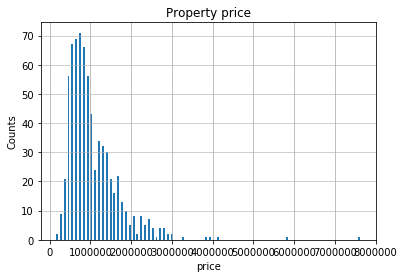

In [124]:
data_df4['Price'].plot.hist(grid=True,bins=80, rwidth=0.5)
plt.title('Property price')
plt.xlabel('price')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [125]:
data_df3['Price'].describe()

count    7.200000000e+02
mean     1.057967306e+06
std      6.520779593e+05
min      1.310000000e+05
25%      6.400000000e+05
50%      8.815000000e+05
75%      1.325000000e+06
max      7.650000000e+06
Name: Price, dtype: float64

We can see that the distribution of label price is not a normal distributoin and most price of properties are between 500000 and  less than 2000000, but there are a few property, their price is very higher than most of properties. The max price is 7.650000000e+06 which is very higher than the mean(1.057967306e+06) and 75%(1.325000000e+06), the price is right-skewed.

### Rooms

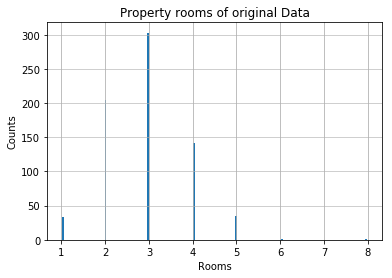

In [126]:
data_df4['Rooms'].plot.hist(grid=True, bins=80, rwidth=0.5)
plt.title('Property rooms of original Data')
plt.xlabel('Rooms')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

We can see that the most large number of rooms in a property is 3, the second number is 4 in one property.Then see the relationship between price and rooms

In [134]:
#see the correlationship between price and rooms
data_df4["Price"].corr(data_df4['Rooms'])

0.4761302778606963

The correlation between price and rooms is less than 0.5, they don't have so much strong relationship,see in the plot

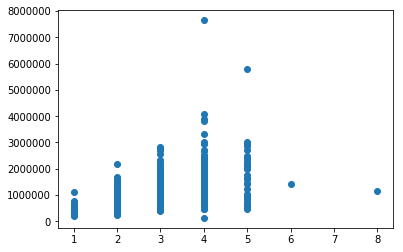

In [233]:
#see the relationship in plot
plt.scatter(data_df4["Rooms"], data_df4["Price"])

From the plot, we see that in the first half part, the Rooms and price looks like have positive linear relationship, but in the another half part, they seems have negative lineat relationship. Overall, the in original data, the Rooms and Price have non-linear relationship if we consider all Room numbers.

In [137]:
type(data_df4.loc[0,'Rooms'])

numpy.int64

### Crime_C_average

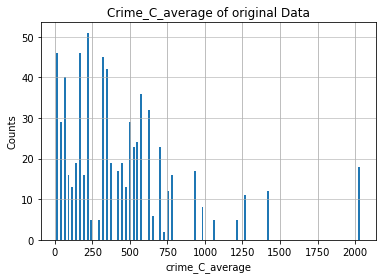

In [140]:
data_df4['crime_C_average'].plot.hist(grid=True, bins=80, rwidth=0.5)
plt.title('Crime_C_average of original Data')
plt.xlabel('crime_C_average')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

From the plot we can see that most of the count of average crimeC of each property is in range (0,750), and the highest count is over 50,the lowest avg_crime number is less than 10, the distribution is also not normal

In [139]:
#see the relationship between price and other attribute
data_df4["Price"].corr(data_df4['crime_C_average'].astype(int))

0.14331615648056256

The correlationship between average crimeC count and price is really low, and lower than the Room' relationship with price, in this situation we have to consider the transformation or normalizaiton of crimeC to make sure their relationship

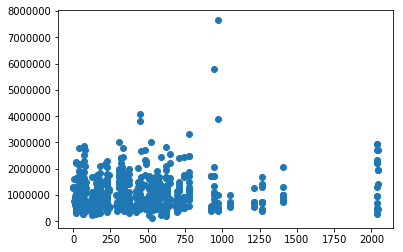

In [235]:
#see the relationship in plot
plt.scatter(data_df4['crime_C_average'], data_df4["Price"])

In the plot,most points fall in the range of (0,1000), it seems that the count of crimeC and price they don't have linear relationship, we might guess they have classicification relation and consider logistic model but this is not what we should focus on in assignment

### travel_min

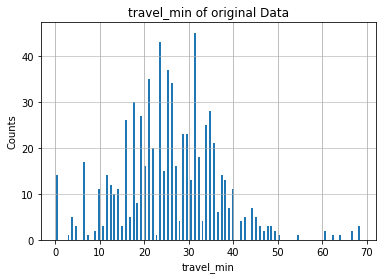

In [141]:
data_df4['travel_min_to_CBD'].plot.hist(grid=True, bins=80, rwidth=0.5)
plt.title('travel_min of original Data')
plt.xlabel('travel_min')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In the travel time plot, the distribution seems like normal distribution except the count of middle part should be more higher, but we can see that the distribution of travel time is not left or right skewed much

In [142]:
#see the correlation between travel and price
data_df4["Price"].corr(data_df4['travel_min_to_CBD'].astype(int))

-0.1634494624065293

The correlation : -0.16 shows that price and travel time, they have negative relationship but it seems like average CrimeC, their relationship are not strong

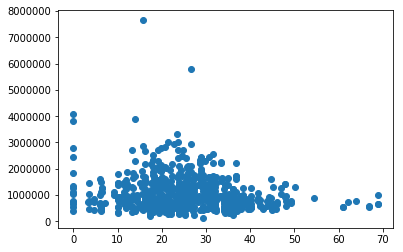

In [237]:
#see the relationship in plot
plt.scatter(data_df4['travel_min_to_CBD'], data_df4["Price"])

From the plot, we still cannot see they have linear relation, and most points fall at 10-40

### property_age

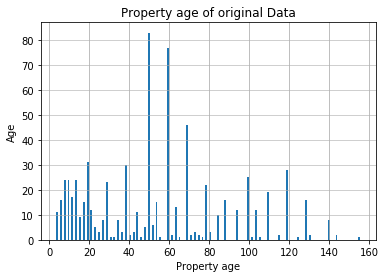

In [239]:
data_df4['Age'].plot.hist(grid=True, bins=80, rwidth=0.5)
plt.title('Property age of original Data')
plt.xlabel('Property age')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)

In the property age plot, we can see that most properties age are similar, there is not much difference between properties except property's age is 45 and 60 , which means that most of the properties was built in 45 or 60 years ago.

In [144]:
#see the correlation between travel and price
data_df4["Price"].corr(data_df4['Age'])

0.2660081951280069

0.267 means that the age and price have positive relationship, but their relation is also not stonger as rooms

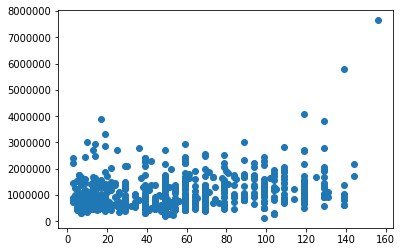

In [238]:
#see the relationship in plot
plt.scatter(data_df4['Age'], data_df4["Price"])

From the plot, we can see that the relation between price and age is nonlinear and it seems like logistic relation if we don't consider the three higher points in 120,140 and 160 are outlier.

## 2.Original data fitting for linear model

Try the original data to build model and see the perfomce of model

In [345]:
#Coding of discrete features
df_original = pd.get_dummies(data_df4)

In [346]:
#cross validation, split dataset to train and test model
X_train, X_test, y_train, y_test = train_test_split(df_original[[x for x in df_original.columns if x in ['Rooms','crime_C_average','travel_min_to_CBD','Age']]],df_original.loc[:,'Price'],random_state=133)


In [347]:
#build linear model
lm_original =  LinearRegression()

In [348]:
#train model and test model
lm_original.fit(X_train,y_train)
print('r-squared for this model = ',lm_original.score(X_test,y_test))

r-squared for this model =  0.3067985355193844


#### We know that R-squared reflects the performce of model, the higher the model better. But according to the R-squard of this model ( 0.3068 ), the perform of this model is not good when we do not do any normalization/transformation

## 3.try normalization/transformation methods 
We can see that the distribution of attributes in the plot are not normal and skewed, so we consider to try this three method to deal with data and see the model performance
* Log
* Power
* sqrt

### 3.1Log transformation calculate r-square value
The common approach to evaluating a funky looking distribution could be to take the log of it just to see if it looks more normal, since the distribution of crimeC and age are not looks like normal, we try log firstly
* log transformation for each attribute, see distribution in plot
* build model and price as label

#### Rooms

In [215]:
#log room
data_df4['lroom'] = None
i = 0
for row in data_df4.iterrows():
    data_df4['lroom'].at[i] = math.log(data_df4["Rooms"][i])
    i += 1

data_df4.head()

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,lroom
0,2,491,21.5,49.0,582500.0,0.693147181
1,2,457.333333,12.5714,59.0,832000.0,0.693147181
2,3,118.666667,40.2222,29.0,508000.0,1.09861229
3,4,20,24,69.0,875000.0,1.38629436
4,3,375.666667,37,49.0,400000.0,1.09861229


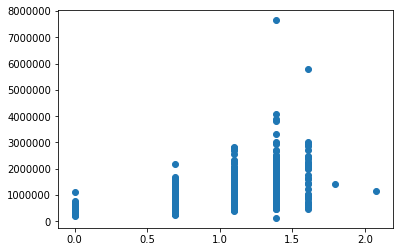

In [232]:
#see the relationship in plot
plt.scatter(data_df4["lroom"], data_df4["Price"])

It seems that the result looks better, but after 15 ,the relation change from positive to negative the increasing trend turn to descrising .

#### Property's Age

In [216]:
#log age
data_df4['LAge'] = None
i = 0
for row in data_df4.iterrows():
    data_df4['LAge'].at[i] = math.log(data_df4["Age"][i])
    i += 1

data_df4.head()

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,lroom,LAge
0,2,491,21.5,49.0,582500.0,0.693147181,3.8918203
1,2,457.333333,12.5714,59.0,832000.0,0.693147181,4.07753744
2,3,118.666667,40.2222,29.0,508000.0,1.09861229,3.36729583
3,4,20,24,69.0,875000.0,1.38629436,4.2341065
4,3,375.666667,37,49.0,400000.0,1.09861229,3.8918203


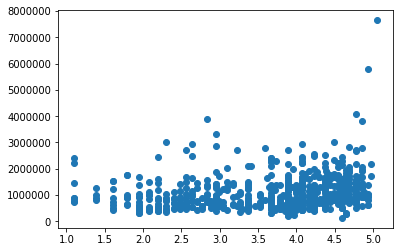

In [231]:
#see the relationship in plot
plt.scatter(data_df4["LAge"], data_df4["Price"])

In the property's age, they still don't have clearly linear relation except only the last samall part

#### Crime C

In [217]:
#log crimeC
data_df4['lcrime_C_average'] = None
i = 0
for row in data_df4.iterrows():
    data_df4['lcrime_C_average'].at[i] = math.log(data_df4["crime_C_average"][i])
    i += 1

data_df4.head()

/Users/bolinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,lroom,LAge,lcrime_C_average
0,2,491,21.5,49.0,582500.0,0.693147181,3.8918203,6.19644413
1,2,457.333333,12.5714,59.0,832000.0,0.693147181,4.07753744,6.12541252
2,3,118.666667,40.2222,29.0,508000.0,1.09861229,3.36729583,4.77631844
3,4,20,24,69.0,875000.0,1.38629436,4.2341065,2.99573227
4,3,375.666667,37,49.0,400000.0,1.09861229,3.8918203,5.92870223


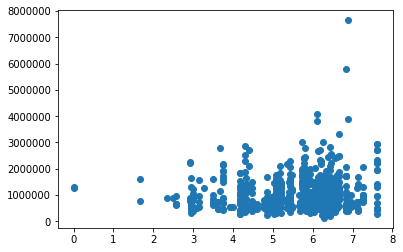

In [230]:
#see the relationship in plot
plt.scatter(data_df4["lcrime_C_average"], data_df4["Price"])

It seems that the average CrimeC count have positive relation with price when we do transformation for crimeC, they have positive trend in the plot but in last one part of points the value decrease 

#### Travel time

In [228]:
#travel_min_to_CBD
data_df4['log_travel_min_to_CBD'] = np.log10(data_df4['travel_min_to_CBD'].astype(int))

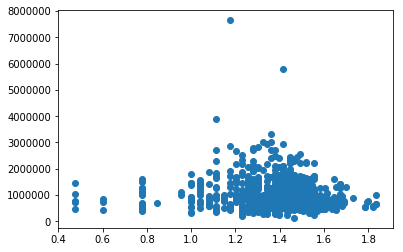

In [284]:
plt.scatter(data_df4["log_travel_min_to_CBD"], data_df4["Price"])

After log the travel time value, we still cannot see that they have linear relation from the plot

#### Build model

In [262]:
df_log.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,lroom,LAge,lcrime_C_average,ltravel_min_to_CBD,log_travel_min_to_CBD
0,2,491,21.5,49.0,582500.0,0.693147181,3.8918203,6.19644413,3.06805294,1.322219295
1,2,457.333333,12.5714,59.0,832000.0,0.693147181,4.07753744,6.12541252,2.53142439,1.079181246
2,3,118.666667,40.2222,29.0,508000.0,1.09861229,3.36729583,4.77631844,3.69441908,1.602059991
3,4,20,24,69.0,875000.0,1.38629436,4.2341065,2.99573227,3.17805383,1.380211242
4,3,375.666667,37,49.0,400000.0,1.09861229,3.8918203,5.92870223,3.61091791,1.568201724


In [276]:
df_log=data_df4

In [301]:
#cross validation, split dataset to train and test model
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_log[["lroom","lcrime_C_average",'travel_min_to_CBD',"LAge"]],df_log['Price'],random_state=11)


In [302]:
#build linear model
lm_log =  LinearRegression()

In [330]:
#train model and test model
lm_log.fit(X_train_log,y_train_log)
print ('r-squared for this model = ',lm_log.score(X_test_log,y_test_log))

r-squared for this model =  0.2729572498292443
mse for this model =  453147334409.50903


We can see that the performance of this model is not good even worse than original data model, actually we can see that there is not much difference of each attribute between orginal and log plot after log the attribute

### 3.2 Power transformation calculate r-square value
The most common approach to evaluating skewed distribution could be to take the power or sqrt of attributes, we try them and compare the result
* taking power for each attribute, see distribution in plot
* build model and price as label

In [311]:
data_pow = data_df4.copy()

In [312]:
data_pow['proom'] = data_pow['Rooms'].apply(lambda x: x*x)
data_pow['ptravel'] = data_pow['travel_min_to_CBD'].apply(lambda x: x*x)
data_pow['pcime'] = data_pow['crime_C_average'].apply(lambda x: x*x)
data_pow['page'] = data_pow['Age'].apply(lambda x: x*x)

In [332]:
#cross validation, split dataset to train and test model
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(data_pow[["proom","pcime",'ptravel',"page"]],data_pow['Price'],random_state=11)


In [333]:
#build linear model
lm_pow =  LinearRegression()

In [337]:
#train model and test model
lm_pow.fit(X_train_p,y_train_p)
print ('r-squared for this model = ',lm_pow.score(X_test_p,y_test_p))

r-squared for this model =  0.32326221790583587


We can see that the performance of powering for linear model is better than log and original

### 3.3 Root transformation calculate r-square value
The another most common approach to evaluating skewed distribution could be to take the sqrt of attributes, we try and compare the result
* sqrt transformation for each attribute, see distribution in plot
* build model and price as label

In [326]:
data_sqrt = data_df4.copy()

In [316]:
#take sqrt of attribute
data_sqrt['rroom'] = data_sqrt['Rooms'].apply(math.sqrt)
data_sqrt['rtravel'] = data_sqrt['travel_min_to_CBD'].apply(math.sqrt)
data_sqrt['rcime'] = data_sqrt['crime_C_average'].apply(math.sqrt)
data_sqrt['rage'] = data_sqrt['Age'].apply(math.sqrt)

In [317]:
#cross validation, split dataset to train and test model
X_trainr, X_testr, y_trainr, y_testr = train_test_split(data_sqrt[["rroom","rcime",'rtravel',"rage"]],data_sqrt['Price'],random_state=111)


In [318]:
#build linear model
lm_root =  LinearRegression()

In [342]:
#train model and test model
lm_root.fit(X_trainr,y_trainr)
print('r-squared for this model = ',lm_root.score(X_testr,y_testr))

r-squared for this model =  0.458263485414528


We can see that the performance of this model is better than original model and power model

## Compare and Conclude

In [349]:
print('r-squared for original model = ',lm_original.score(X_test,y_test))
print('r-squared for log_linear_model = ',lm_log.score(X_test_log,y_test_log))
print('r-squared for power_linear model = ',lm_pow.score(X_test_p,y_test_p))
print('r-squared for this model = ',lm_root.score(X_testr,y_testr))

r-squared for original model =  0.3067985355193844
r-squared for log_linear_model =  0.2729572498292443
r-squared for power_linear model =  0.32326221790583587
r-squared for this model =  0.458263485414528


## Conclusion

The reason of choosing the log and sqrt method to deal with attribute is that this two method are most commonly using approach for most data cases and more importantly, the distributions of this four attritubes are not normal and some are skewed. In practice, in order to reduce right skewness, take roots or logarithms or reciprocals, in order to reduce left skewness, take squares or cubes or higher powers, since  there are left and right skewed distribution of attributes, we try power and sqrt, and we can see the result sqrt have the best performance.